## Initialization

In [16]:
import unet, imageGeneration, benchmark

## Define image parameters function

In [17]:
def image_parameters_function(lower_limit_SNR, higher_limit_SNR, image_size = 256):
    from numpy.random import uniform, randint
    from numpy import ones
    from math import pi
    
    particle_number = randint(20, 30)
    particle_radius_list = uniform(0.5, 2, particle_number)
    (particle_center_x_list, particle_center_y_list) = imageGeneration.get_particle_positions(particle_radius_list, image_size)

    particle_bessel_orders_list = []
    particle_intensities_list = []

    for i in range(particle_number):
        particle_bessel_orders_list.append([1, ])
        particle_intensities_list.append([uniform(0.05, 0.13, 1), ])

    image_parameters = imageGeneration.get_image_parameters(
        particle_center_x_list=lambda: particle_center_x_list,
        particle_center_y_list=lambda: particle_center_y_list,
        particle_radius_list=lambda: particle_radius_list,
        particle_bessel_orders_list=lambda: particle_bessel_orders_list,
        particle_intensities_list=lambda: particle_intensities_list,
        image_size=lambda: image_size,
        image_background_level=lambda: uniform(.3, .5),
        signal_to_noise_ratio=lambda: uniform(lower_limit_SNR, higher_limit_SNR),
        gradient_intensity=lambda: uniform(0, 0),
        gradient_direction=lambda: uniform(-pi, pi),
        ellipsoidal_orientation=lambda: uniform(-pi, pi, particle_number),
        ellipticity=lambda: 1)

    return image_parameters

In [18]:
def plot_TPR_over_FPR_as_function_of_SNR(model, lower_SNR, higher_SNR):
    from matplotlib import pyplot as plt
    
    TPRoverFPR = []
    for SNR in range(lower_SNR, higher_SNR+1):
        (batch_images, batch_labels, batch_predictions) = imageGeneration.get_batch(batch_size = 10,
                                                                                    verbose = False,
                                                                                get_image_parameters_function = lambda:image_parameters_function(lower_limit_SNR = SNR,
                                                                                                                                                 higher_limit_SNR = SNR+1))
        batch_predictions = model.predict(batch_images)
        batch_predictions = imageGeneration.cutoff(batch_predictions, cutoff_value = 0.5, apply_sigmoid = True)
        P, N, TP, TN, FP, FN = benchmark.operating_characteristics(batch_labels, batch_predictions)
        TPRoverFPR.append((TP/P)/(FP/N))
    plt.plot(range(lower_SNR,higher_SNR+1), TPRoverFPR, label = 'Papiez')
    plt.ylim(0,500)
    plt.show()

In [19]:
def plot_ROC_curve_as_function_of_SNR(model, lower_SNR, higher_SNR):
    from matplotlib import pyplot as plt
    
    TPR = []
    FPR = []
    for SNR in range(lower_SNR, higher_SNR+1):
        (batch_images, batch_labels, batch_predictions) = imageGeneration.get_batch(batch_size = 10,
                                                                                    verbose = False,
                                                                                get_image_parameters_function = lambda:image_parameters_function(lower_limit_SNR = SNR,
                                                                                                                                                 higher_limit_SNR = SNR+1))
        batch_predictions = model.predict(batch_images)
        batch_predictions = imageGeneration.cutoff(batch_predictions, cutoff_value = 0.5, apply_sigmoid = True)
        P, N, TP, TN, FP, FN = benchmark.operating_characteristics(batch_labels, batch_predictions)
        TPR.append(TP/P)
        FPR.append(FP/N)
    plt.plot(FPR, TPR, label = 'Papiez')
    plt.ylim(0,1)
    plt.xlim(0,0.2)
    plt.show()

## Fit using generator

Time taken for batch generation of size 10: 0.12667369842529297 s.


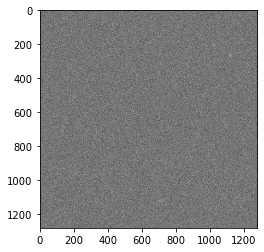

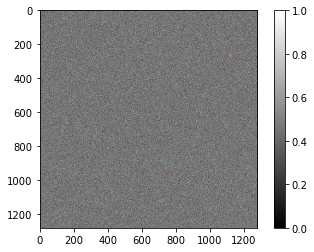

Filename is 2020-03-25\unet_particle.hdf5. Loss is 5.5709. Accuracy is 0.9882.
SNR = 15
P is 1269, N is 654091, TP is 753, TN is 646855, FP is 7236, FN is 516
TPR is 59.3381 percent, FPR is 1.1063 percent

TPR/FPR is 53.6380


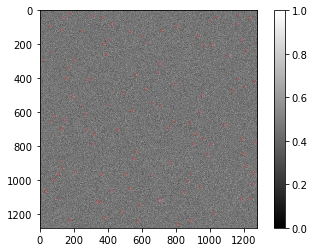

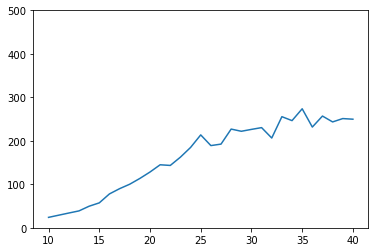

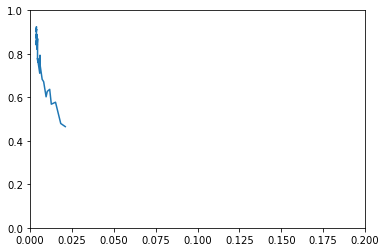

Filename is 2020-03-26_1\unet_particle.hdf5. Loss is 8.5064. Accuracy is 0.9371.
SNR = 15
P is 1269, N is 654091, TP is 919, TN is 613195, FP is 40896, FN is 350
TPR is 72.4192 percent, FPR is 6.2523 percent

TPR/FPR is 11.5827


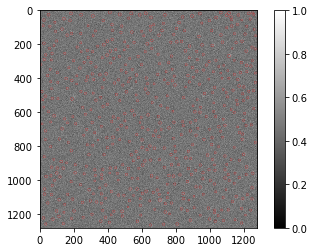

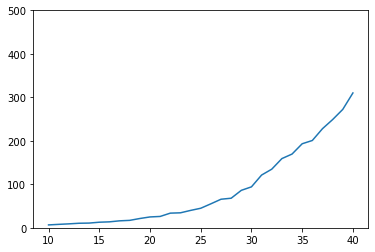

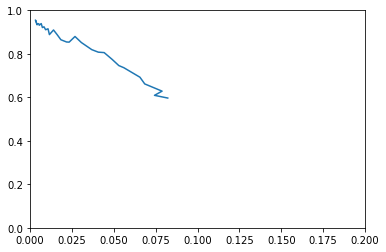

Filename is 2020-03-26_2\unet_particle.hdf5. Loss is 6.1519. Accuracy is 0.9771.
SNR = 15
P is 1269, N is 654091, TP is 742, TN is 639588, FP is 14503, FN is 527
TPR is 58.4712 percent, FPR is 2.2173 percent

TPR/FPR is 26.3708


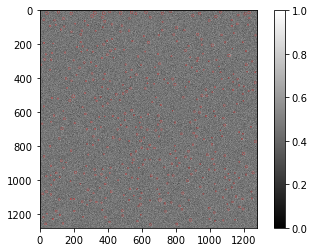

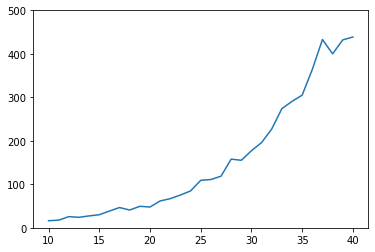

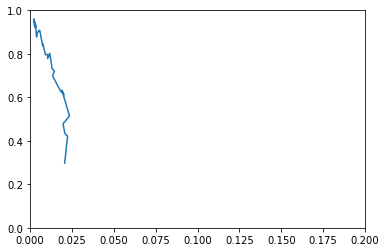

Filename is 2020-03-26_4\unet_particle.hdf5. Loss is 4.4624. Accuracy is 0.9939.
SNR = 15
P is 1269, N is 654091, TP is 743, TN is 650646, FP is 3445, FN is 526
TPR is 58.5500 percent, FPR is 0.5267 percent

TPR/FPR is 111.1671


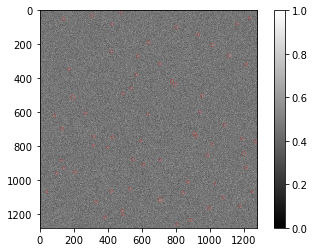

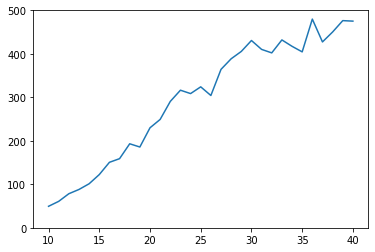

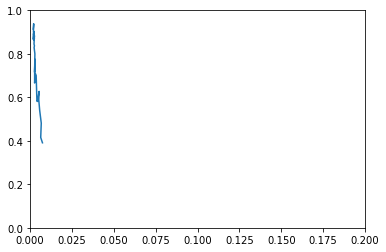

Filename is 2020-03-27_1\unet_particle.hdf5. Loss is 4.1959. Accuracy is 0.9940.
SNR = 15
P is 1269, N is 654091, TP is 749, TN is 650655, FP is 3436, FN is 520
TPR is 59.0229 percent, FPR is 0.5253 percent

TPR/FPR is 112.3583


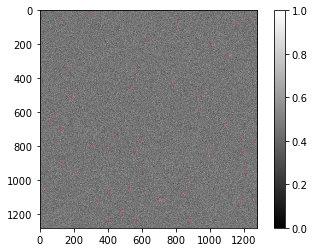

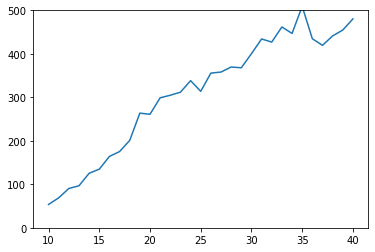

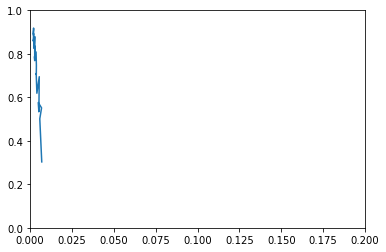

Filename is 2020-03-27_2\unet_particle.hdf5. Loss is 4.2520. Accuracy is 0.9821.
SNR = 15
P is 1269, N is 654091, TP is 880, TN is 642767, FP is 11324, FN is 389
TPR is 69.3459 percent, FPR is 1.7313 percent

TPR/FPR is 40.0552


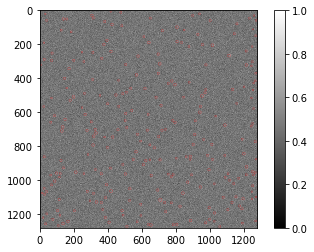

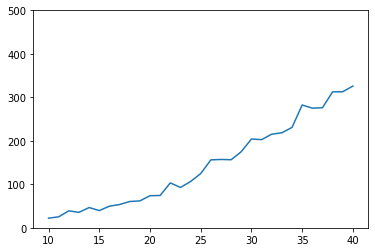

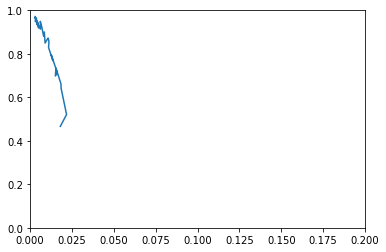

Filename is 2020-03-28_1\unet_particle.hdf5. Loss is 5.7922. Accuracy is 0.9533.
SNR = 15
P is 1269, N is 654091, TP is 987, TN is 623743, FP is 30348, FN is 282
TPR is 77.7778 percent, FPR is 4.6397 percent

TPR/FPR is 16.7635


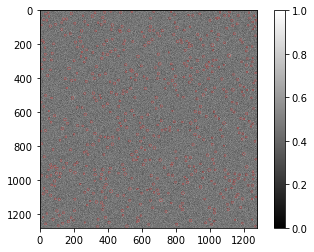

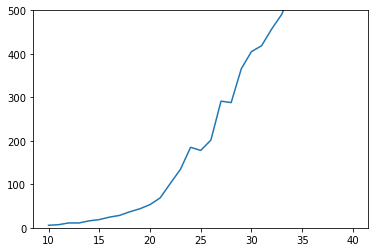

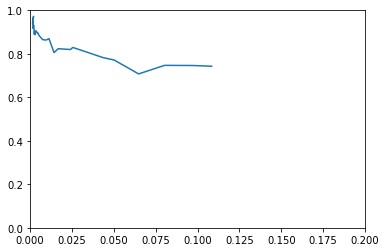

Filename is 2020-03-28_2\unet_particle.hdf5. Loss is 4.4763. Accuracy is 0.9796.
SNR = 15
P is 1269, N is 654091, TP is 900, TN is 641071, FP is 13020, FN is 369
TPR is 70.9220 percent, FPR is 1.9905 percent

TPR/FPR is 35.6294


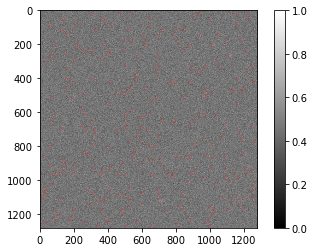

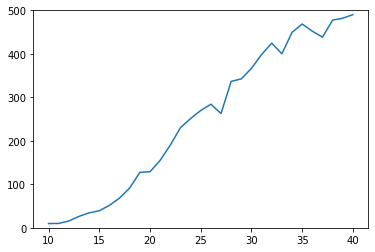

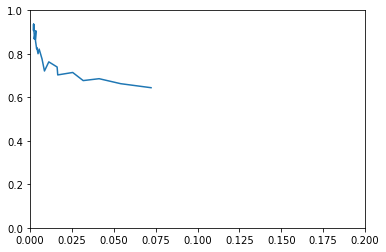

Filename is 2020-03-29_1\unet_particle.hdf5. Loss is 3.9569. Accuracy is 0.9945.
SNR = 15
P is 1269, N is 654091, TP is 778, TN is 650955, FP is 3136, FN is 491
TPR is 61.3081 percent, FPR is 0.4794 percent

TPR/FPR is 127.8734


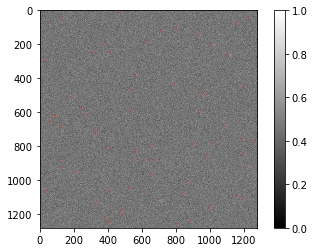

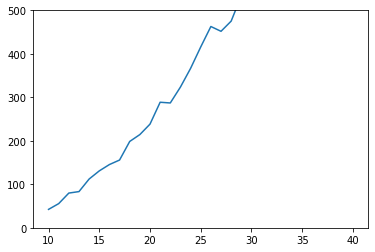

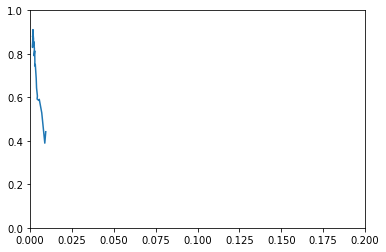

In [20]:
import glob, os
from matplotlib import pyplot as plt
from scipy.ndimage import zoom

lower_limit_SNR = 15
higher_limit_SNR = 16
(batch_images, batch_labels, batch_predictions) = imageGeneration.get_batch(batch_size = 10,
                                                                            get_image_parameters_function = lambda:image_parameters_function(lower_limit_SNR = lower_limit_SNR, 
                                                                                                                                             higher_limit_SNR = higher_limit_SNR))

model = unet.create_unet()

plt.imshow(zoom(batch_images[0,:,:,0],5.0), cmap = 'gray', vmin = 0, vmax = 1)
plt.show()

imageGeneration.visualise_batch((batch_images, batch_labels, batch_predictions), use_predictions = False)
plt.show()

for filename in glob.iglob('C:\School\Årskurs 3\Kandidat\DeepTrack\DeepTrack 1.0\\NewNetwork' + '\*\*.hdf5', recursive=True):
    
    model.load_weights(filename)
    metrics = model.evaluate(batch_images, batch_labels, verbose = False)
    filenameList = filename.split('\\')
    print("Filename is %s. Loss is %.4f. Accuracy is %.4f." % ('\\'.join(filenameList[len(filenameList)-2:len(filenameList)]), metrics[0], metrics[6]))
    batch_predictions = model.predict(batch_images)
    batch_predictions = imageGeneration.cutoff(batch_predictions, cutoff_value = 0.5, apply_sigmoid = True)
    P, N, TP, TN, FP, FN = benchmark.operating_characteristics(batch_labels, batch_predictions)
    print("SNR = %d" % lower_limit_SNR)
    print("P is %d, N is %d, TP is %d, TN is %d, FP is %d, FN is %d" % (P, N, TP, TN, FP, FN))
    print("TPR is %.4f percent, FPR is %.4f percent\n" % (TP/P*100, FP/N*100))
    print("TPR/FPR is %.4f" % ((TP/P)/(FP/N)))
    
    imageGeneration.visualise_batch((batch_images, batch_labels, batch_predictions), use_predictions = True)
    plt.show()
    plot_TPR_over_FPR_as_function_of_SNR(model,10,40)
    plot_ROC_curve_as_function_of_SNR(model, 10, 40)

    

